In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [7]:
# read the datase
df = pd.read_excel("Main.xlsx", header=0)
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [9]:
round(100*(df.isnull().sum())/len(df), 2)

Area Name                      0.0
Illiterate                     0.0
Graduate & above               0.0
Total - Population             0.0
Percentage Illiterate          0.0
Percentage Graduate & above    0.0
dtype: float64

In [10]:
df.describe()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
count,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,7.678103e+06,1.075194e+06,3.459586e+07,20.101981,3.483161
std,1.133721e+07,1.399289e+06,4.445234e+07,5.762072,1.661141
min,8.337000e+03,1.482000e+03,6.447300e+04,11.176535,1.454525
25%,3.098615e+05,5.948800e+04,1.421136e+06,16.076337,2.333452
50%,3.378518e+06,5.253010e+05,1.678794e+07,19.405567,3.073549
75%,1.036886e+07,1.596484e+06,6.076749e+07,24.170387,4.106503
max,5.422576e+07,5.741485e+06,1.998123e+08,33.460356,8.648065


In [12]:
df.shape

(35, 6)

In [13]:
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [15]:
req_df = df[['Total - Population' , 'Percentage Illiterate'  , 'Percentage Graduate & above']]
req_df.head()

,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,12541302,26.939133,3.073549
1,6864602,14.039299,3.903154
2,27743338,17.612390,3.530667
3,1055450,16.599555,8.648065
4,10086292,19.127307,5.208069


In [27]:
# instantiate
from sklearn import preprocessing
scaler = StandardScaler()

# fit_transform
req_df_scaled = scaler.fit_transform(req_df)
req_df_scaled.shape

(35, 3)

In [28]:
req_df_scaled = pd.DataFrame(req_df_scaled)
req_df_scaled.columns = ['Total - Population' , 'Percentage Illiterate'  , 'Percentage Graduate & above']
req_df_scaled.head()

,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.503383,1.203902,-0.250185
1,-0.632950,-1.067532,0.256526
2,-0.156405,-0.438373,0.029016
3,-0.765541,-0.616716,3.154645
4,-0.559417,-0.171623,1.053547


In [29]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(req_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [30]:
kmeans.labels_

array([0, 2, 2, 3, 2, 2, 3, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 3, 2], dtype=int32)

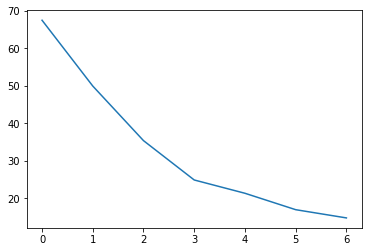

In [31]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(req_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [32]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(req_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(req_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.29797702137496684
For n_clusters=3, the silhouette score is 0.2622844728121979
For n_clusters=4, the silhouette score is 0.3518695554523517
For n_clusters=5, the silhouette score is 0.3593293065049708
For n_clusters=6, the silhouette score is 0.3222497066758997
For n_clusters=7, the silhouette score is 0.31589467359247975
For n_clusters=8, the silhouette score is 0.3060638231309141


In [33]:
# final model with k=3
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(req_df_scaled)

KMeans(max_iter=50, n_clusters=5)

In [34]:
kmeans.labels_

array([1, 0, 0, 3, 0, 0, 3, 1, 4, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 3, 0], dtype=int32)